# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os

import sys
sys.path.insert(0, '../../')

%matplotlib inline

/home/saucecat/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from pdpbox import pdp, get_dataset

## get dataset

In [3]:
test_titanic = get_dataset.titanic()

In [4]:
test_titanic.keys()

['xgb_model', 'data', 'features', 'target']

In [5]:
titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']

## Test interaction between two variables
### interaction between two numeric variables Age and Fare

In [6]:
inter1 = pdp.pdp_interact(titanic_model, titanic_data[titanic_features], ['Age', 'Fare'], 
                          num_grid_points=[10, 10], percentile_ranges=[(5, 95), (5, 95)])

In [7]:
inter1.pdp_isolate_out1

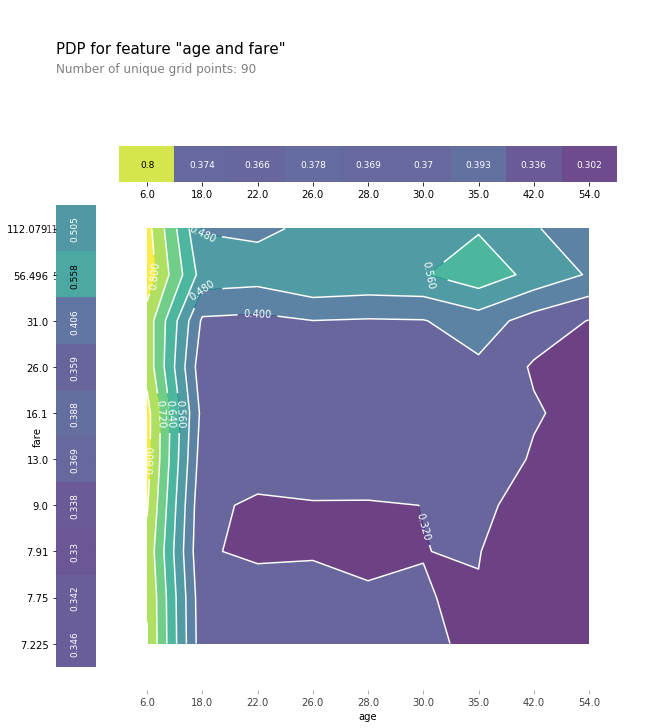

In [8]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='contour', x_quantile=False, plot_pdp=True, figsize=(10.5, 12.5))

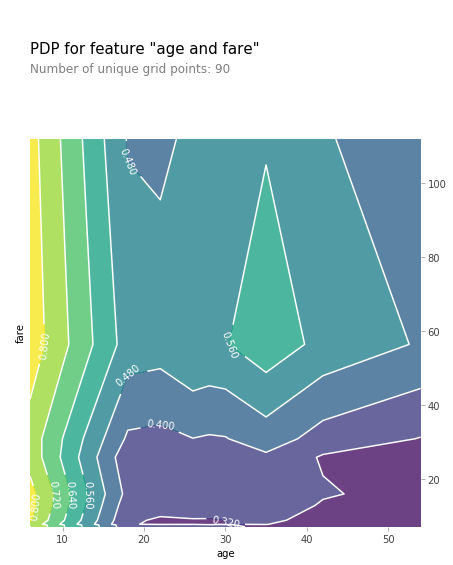

In [9]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='contour', x_quantile=False, plot_pdp=False)

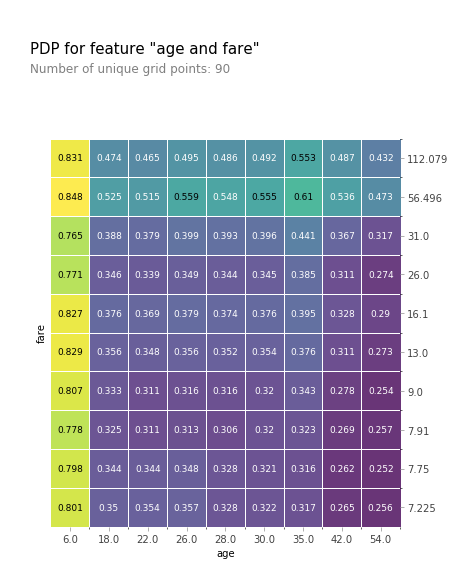

In [12]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], plot_type='grid', x_quantile=True)

#### it is better to set x_quantile=True

In [ ]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also only plot out the contour plot by seting only_inter=True

In [ ]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], x_quantile=True, only_inter=True)